In [122]:
'''
GDrive Link for the video :- https://drive.google.com/drive/folders/11Vxcn1Xj513ZsZeTMwj-gT777CxKbkrG?usp=sharing
'''

In [ ]:
'''
==> All of the code blocks are commented with appropriate self explanatory comments wherever it is deemed necessary.
==> All ChatGPT prompts,if any have been mentioned at the top of each block of code starting with ##.
==> The question number of each of the questions have been mentioned at the top of each code block. 
==> Important observations, if any, have been added with the comments .
==> Long and detailed observations have been added in a new code block using multi-line comments.
'''

In [269]:
#Importing the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from PIL.ImageOps import scale

In [167]:
import pprint #Importing pprint, used for better readability of the material 

In [123]:
data_frame = pd.read_csv('Customer-Data - 2.csv') #Loading the data_frame 

In [124]:
#Question 1 
##Visualize and pre-process the data as appropriate. You might have to use a power, an exponential, ora log transformation
##You may find and drop some of the highly correlated or inappropriate variables, or encode discretevariables as appropriate

data_frame.head() #Viewing the data_frame 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [125]:
data_frame.info() #Getting the information about the data frame 
#I am making an assumption here that only the NaN entries are the missing entries and the value 0 is considered to be the given value for the respective columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [126]:
print(len(data_frame['CUST_ID'])) #Printing the length of data frame 

8950


In [127]:
'''
Thus from the above analysis we can observe that in all the columns are having non-zero values except for the column "CREDIT_LIMIT" and "MINIMUM_PAYMENTS".
'''

'\nThus from the above analysis we can observe that in all the columns are having non-zero values except for the column "CREDIT_LIMIT" and "MINIMUM_PAYMENTS".\n\n'

In [128]:
#Calculating the number of missing entries 
nan_minimum_payments = data_frame['MINIMUM_PAYMENTS'].isna()
print(nan_minimum_payments.value_counts())

MINIMUM_PAYMENTS
False    8637
True      313
Name: count, dtype: int64


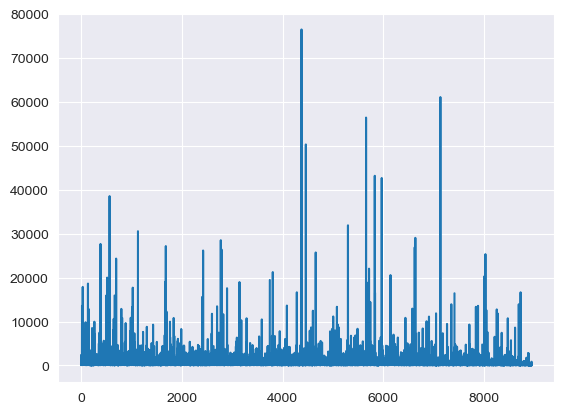

In [129]:
#Plotting the column MINIMUM_PAYMENTS
data_frame['MINIMUM_PAYMENTS'].plot(kind = 'line')
plt.show()

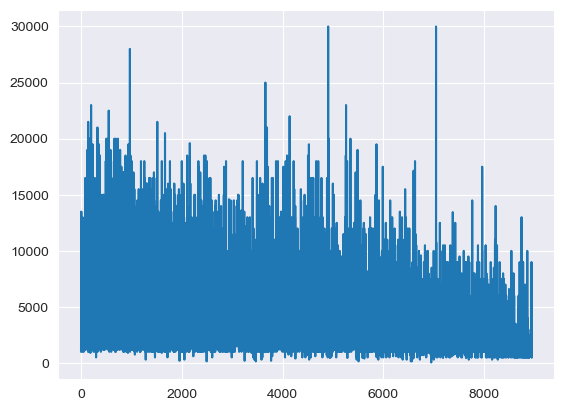

In [130]:
#Plotting CREDIT_LIMIT
data_frame['CREDIT_LIMIT'].plot(kind = 'line')
plt.show()

In [131]:
#Here I have defined a function for extrapolating the missing values. I have used the method of using the average of the 2 immediate non-NaN values to the given NaN value. For this I went in to a depth of 3 as in the given data set, there were at max 3 consecutive NaN values.
def smooth_nan(series):
    l = len(series) #Getting the length of the given series 
    #The for loop for executing the above function 
    for i in range(1,l-1):
        if pd.isna(series[i]): #Checking for NaN values 
            if not pd.isna(series[i-1]) and not pd.isna(series[i+1]): #Checking for the next value to be NaN or not
                series[i] = ( series[i-1] + series[i+1] )/2 #Averaging out the values 
            elif not pd.isna(series[i-1]) and not pd.isna(series[i+2]): #Checking for the next-to-next value to be NaN or not 
                series[i] = ( series[i-1] + series[i+2] )/2 #Averaging out the values
            elif not pd.isna(series[i-1]) and not pd.isna(series[i+3]): #Checking for the next-to-next-to-next value to be NaN or not 
                series[i] = ( series[i-1] + series[i+3] )/2 #Averaging out the values 
    return series

In [ ]:
#Testing the above function 
smooth_series = smooth_nan(data_frame['MINIMUM_PAYMENTS'])

In [133]:
#Checking to see if all the NaN values have been replaced or not 
count = 0
for val in smooth_series:
    if math.isnan(val) == True:
        count += 1
# smooth_series.isna()
count

0

In [ ]:
'''
From the above output, we can see that all the NaN values have been replaced 
'''

In [134]:

data_frame_2 = data_frame.copy() #Creating a copy of the data frame 
data_frame_2['MINIMUM_PAYMENTS'] = smooth_nan(data_frame_2['MINIMUM_PAYMENTS']) #Smoothening the column MINIMUM PAYMENTS
data_frame_2['MINIMUM_PAYMENTS'] #Viewing the column 
data_frame_2.info() #Getting information of data_frame_2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:

credit_smooth = smooth_nan(data_frame_2['CREDIT_LIMIT']) #Smoothening the column CREDIT_LIMIT
credit_smooth #Viewing the smoothened column 

In [136]:
#Code to check for NaN values 
count = 0
for val in credit_smooth:
    if math.isnan(val) == True:
        count += 1
# smooth_series.isna()
count

0

In [137]:
data_frame_smooth = data_frame_2.copy()#Creating a copy for the data frame 
data_frame_smooth['CREDIT_LIMIT'] = smooth_nan(data_frame_smooth['CREDIT_LIMIT']) #Smoothening the column CREDIT_LIMIT
data_frame_smooth.info()#Getting the information of the same 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [138]:
#Importing the required files 
from sklearn.preprocessing import PowerTransformer

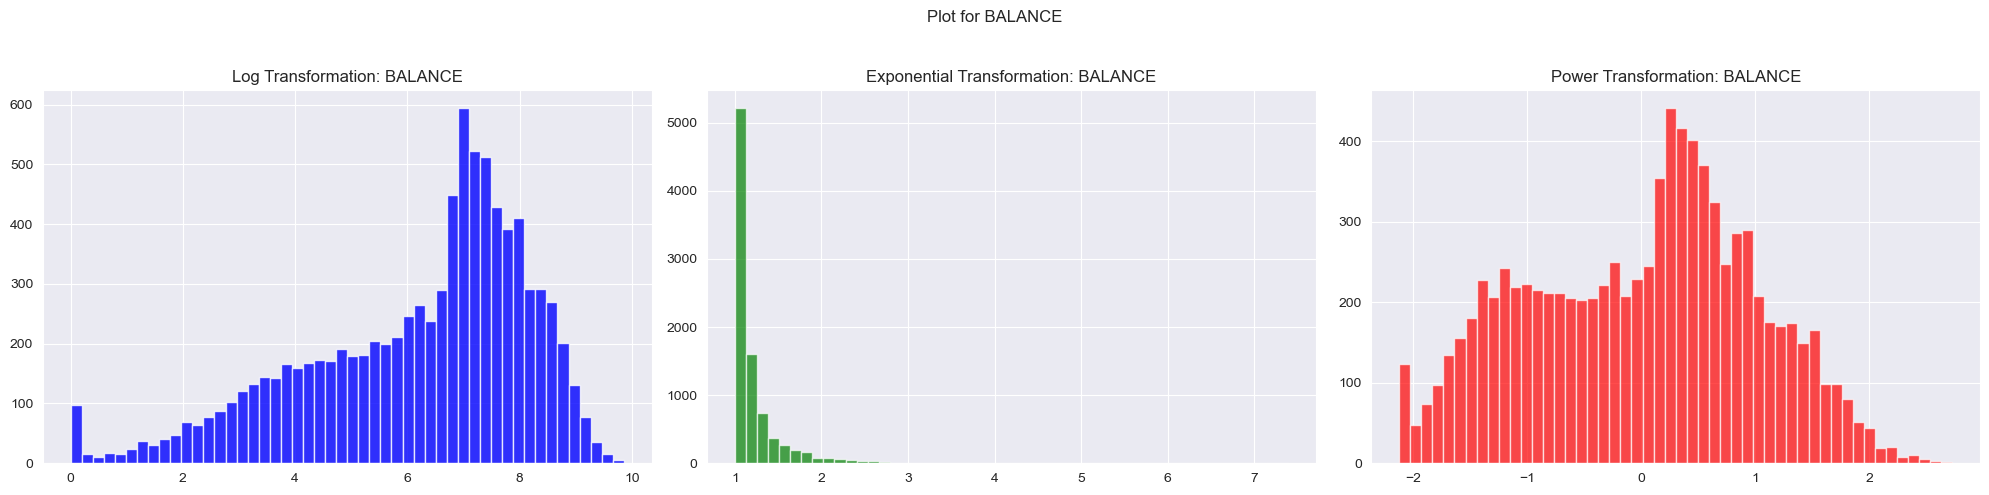

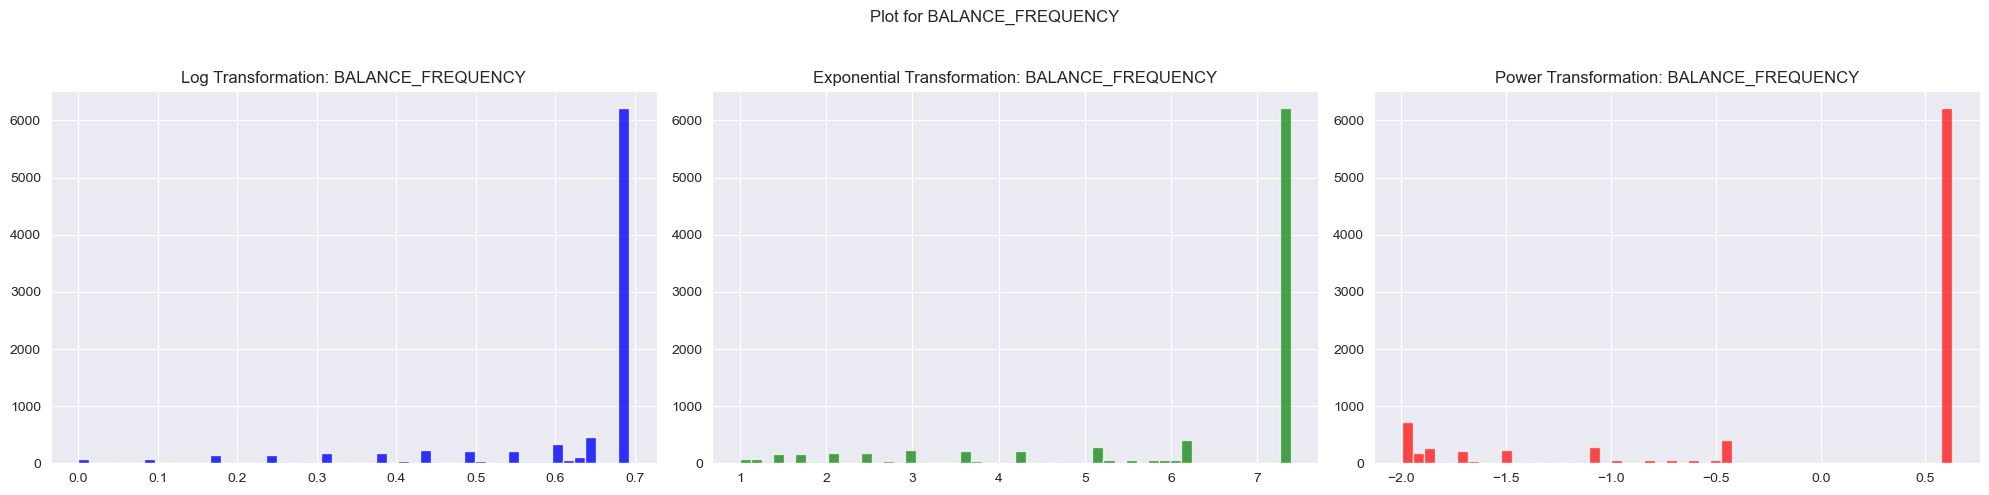

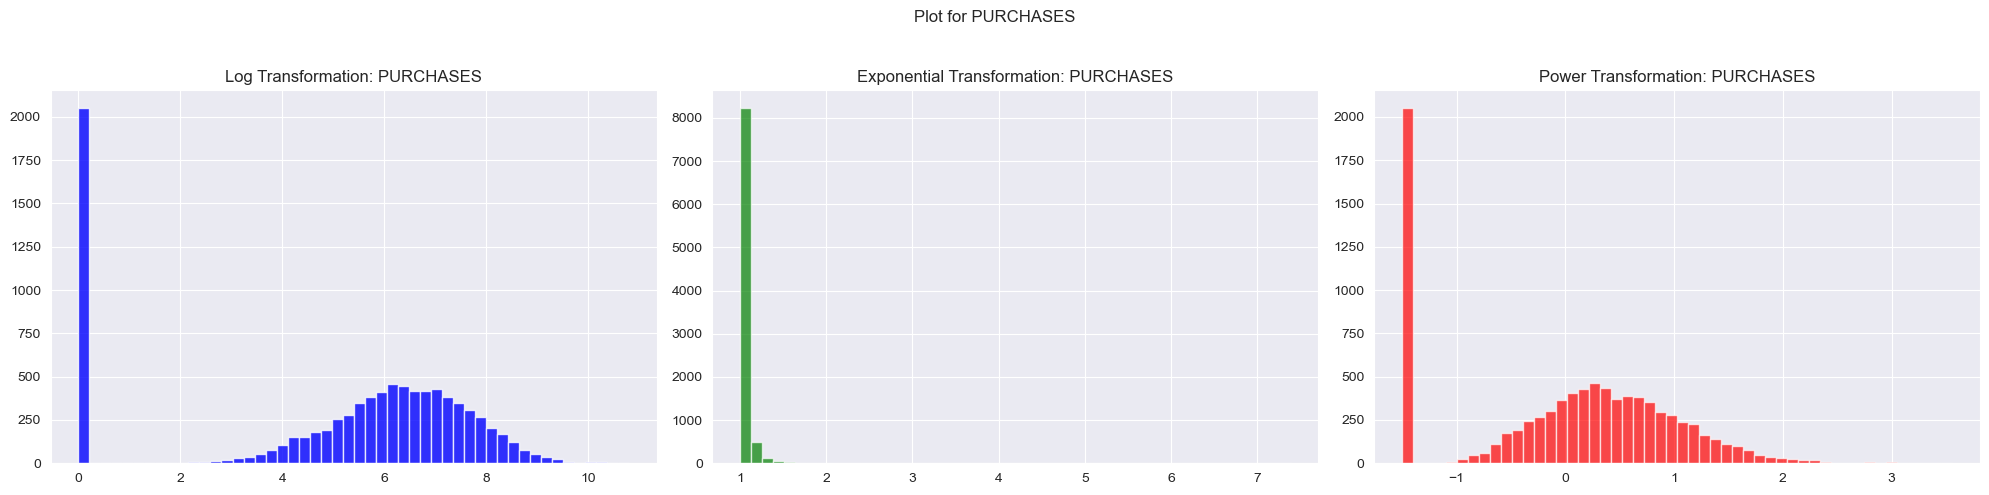

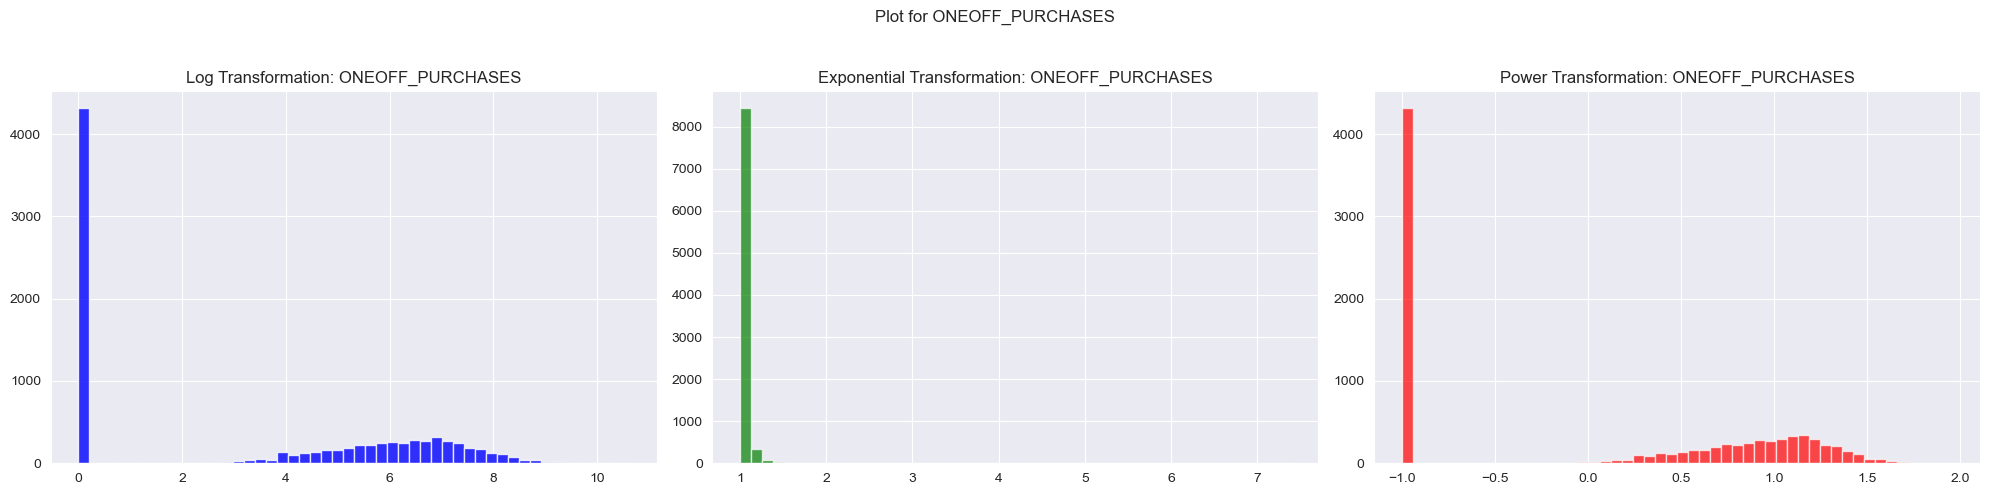

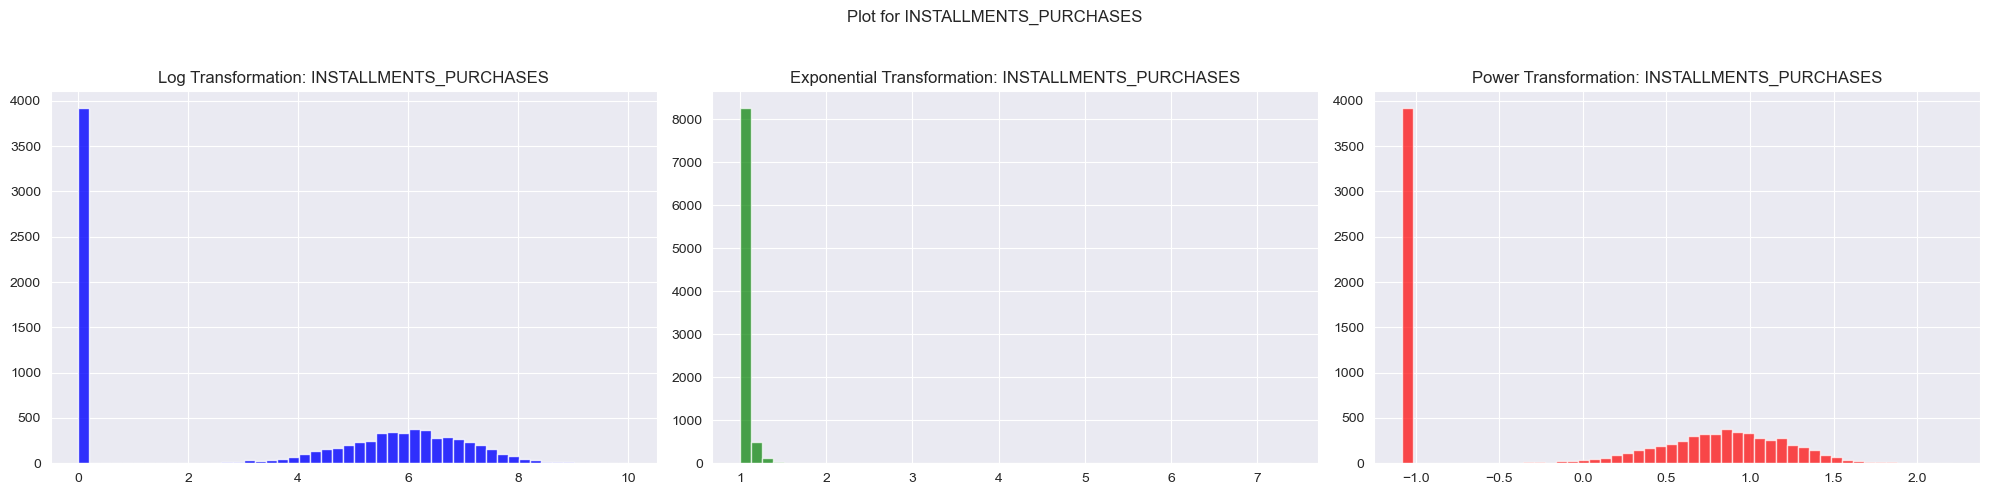

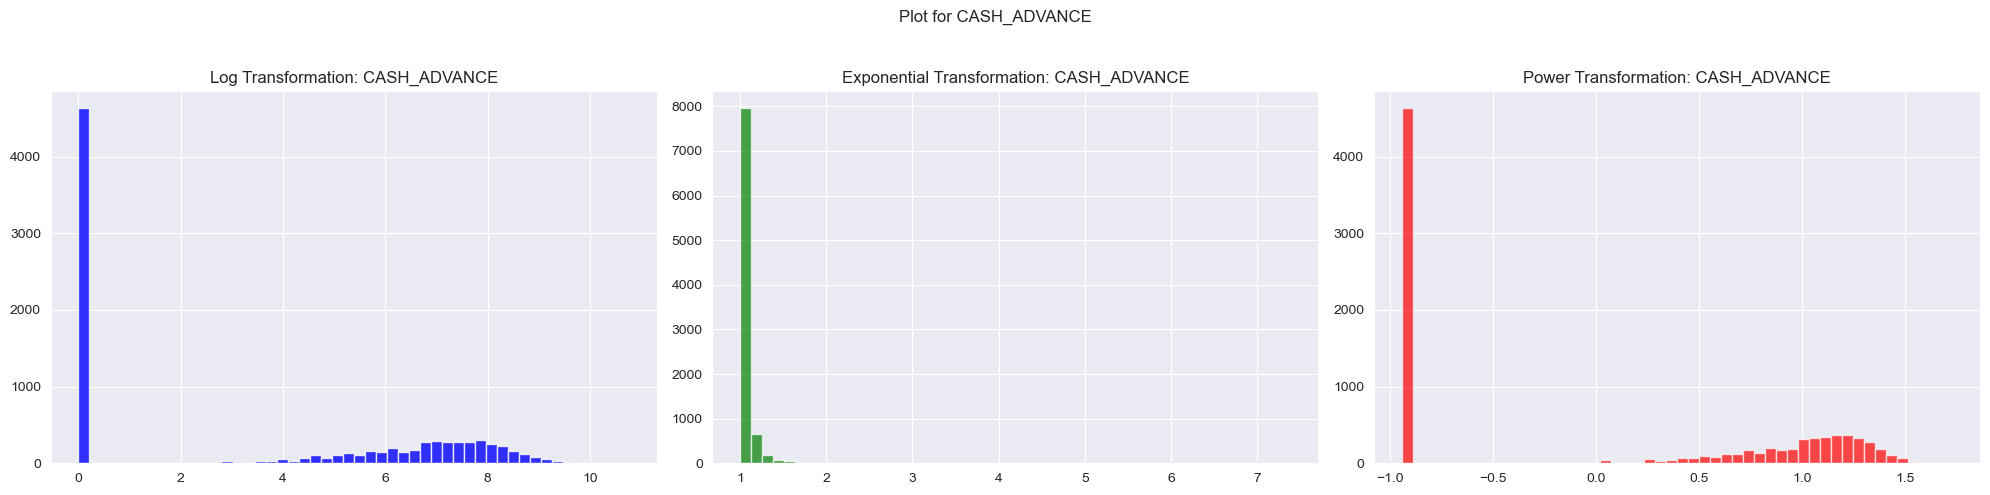

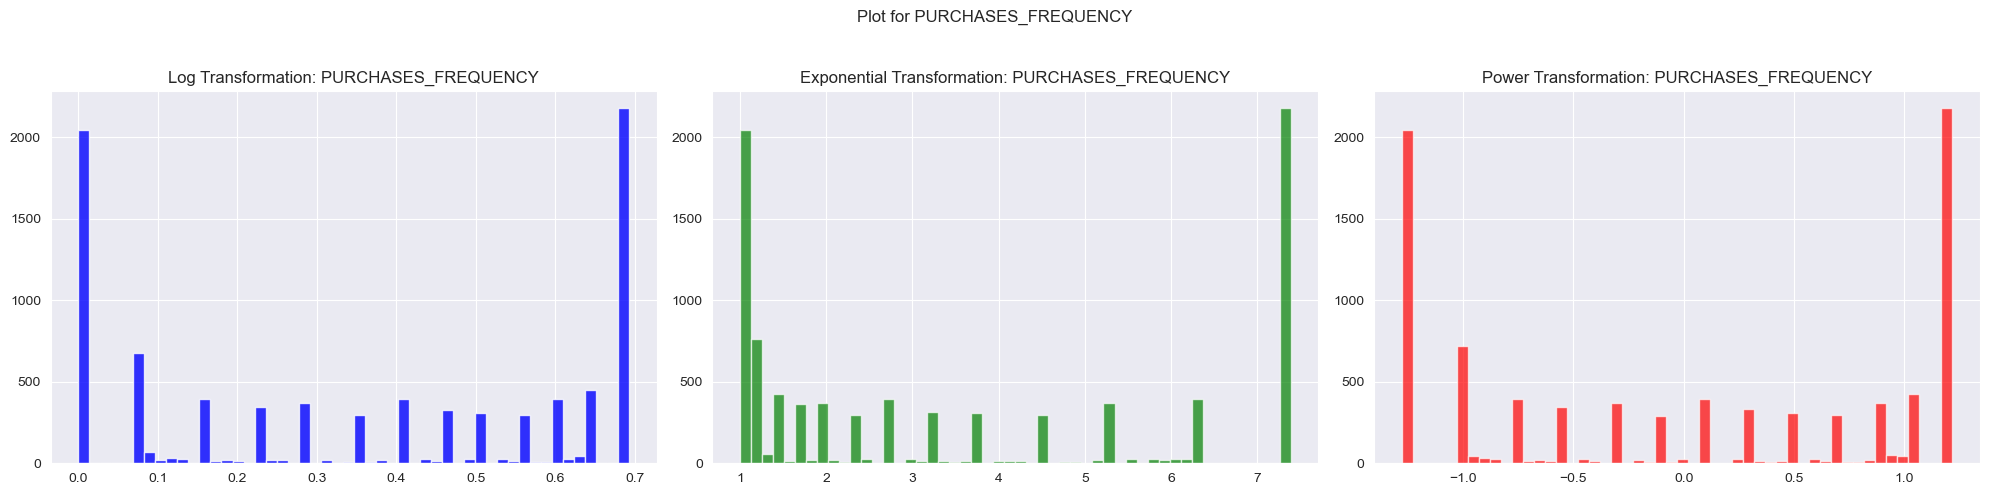

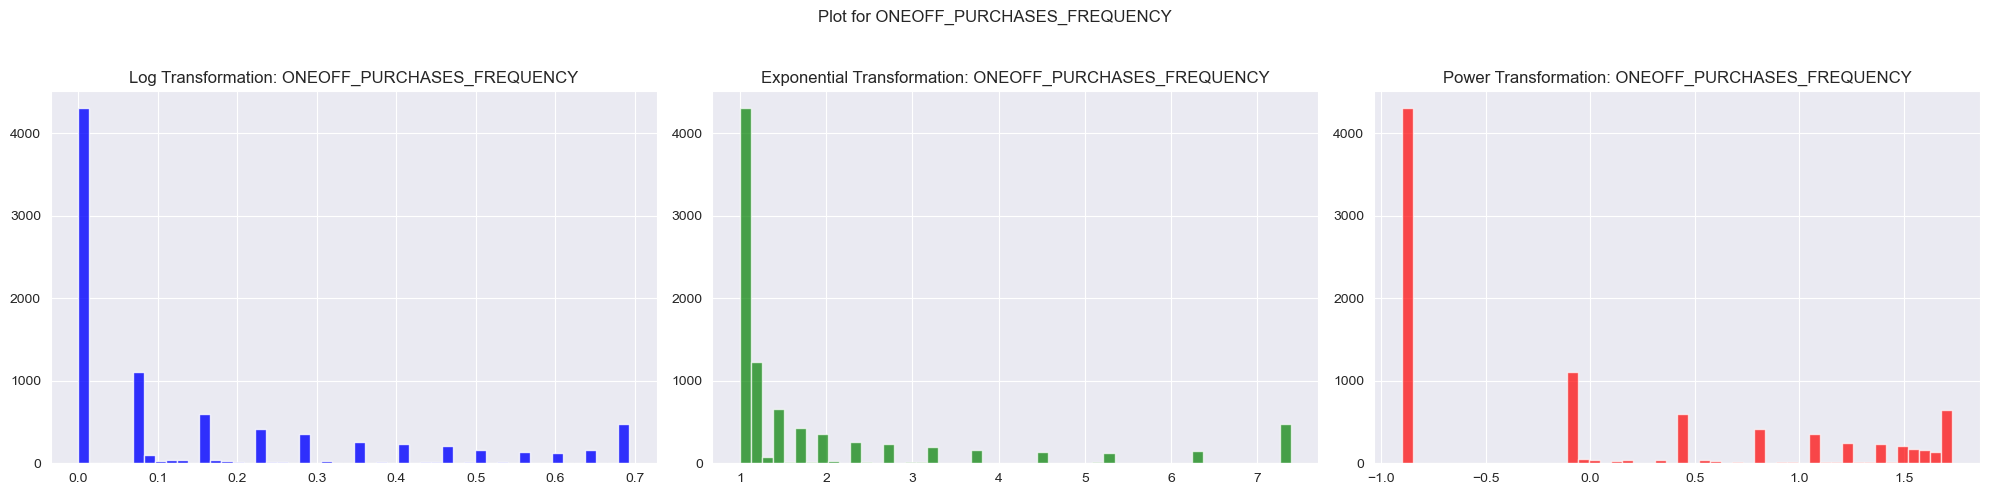

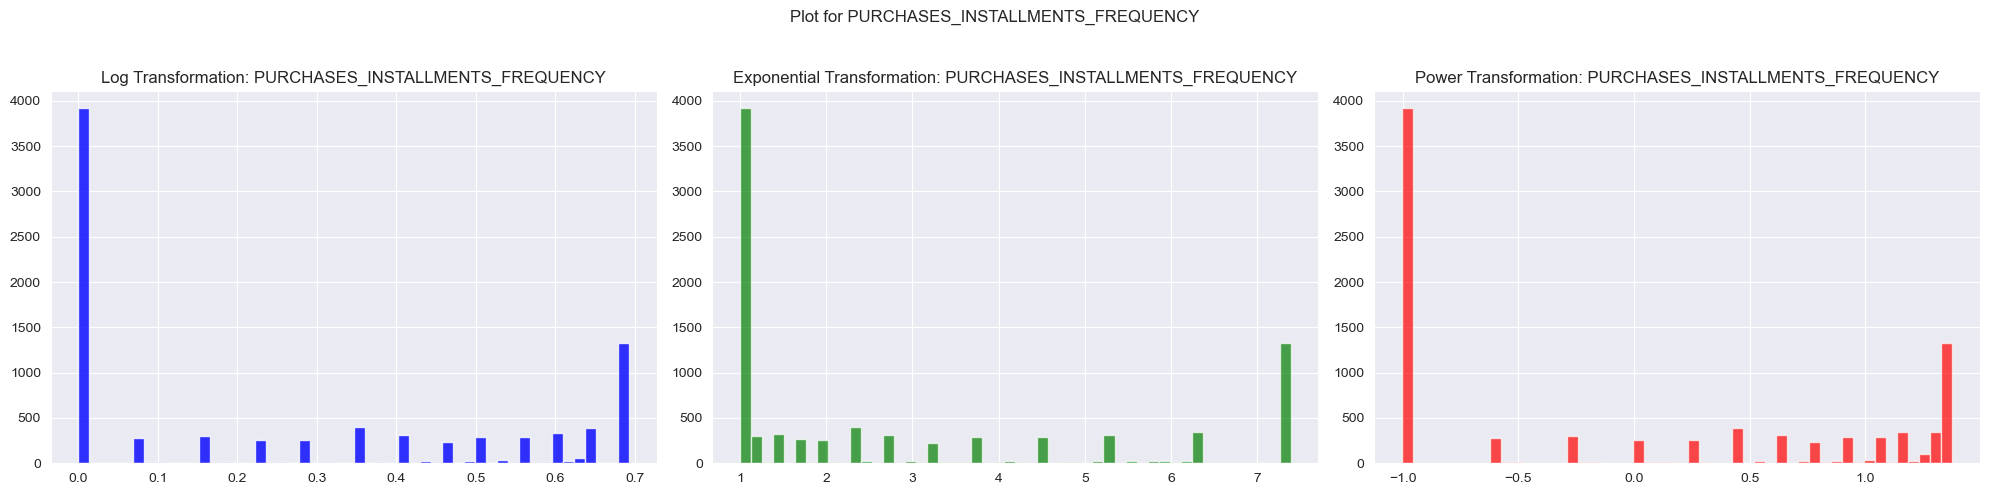

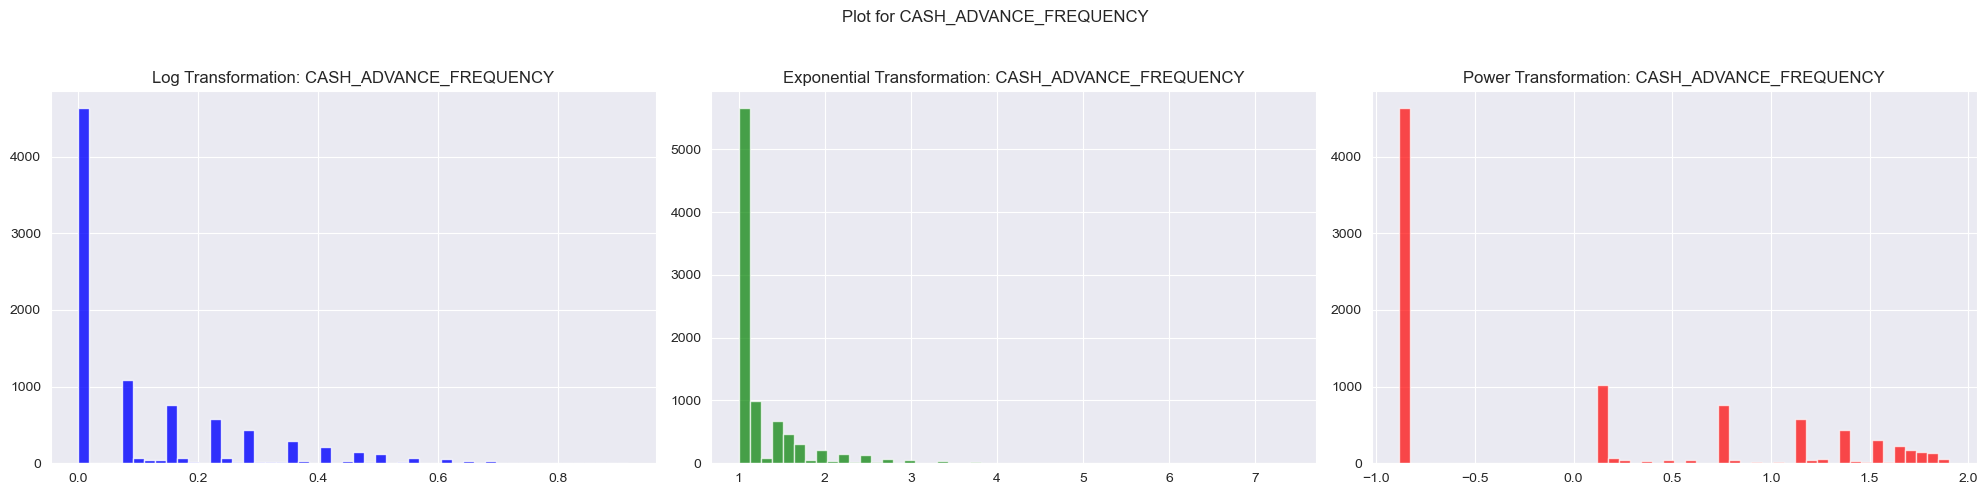

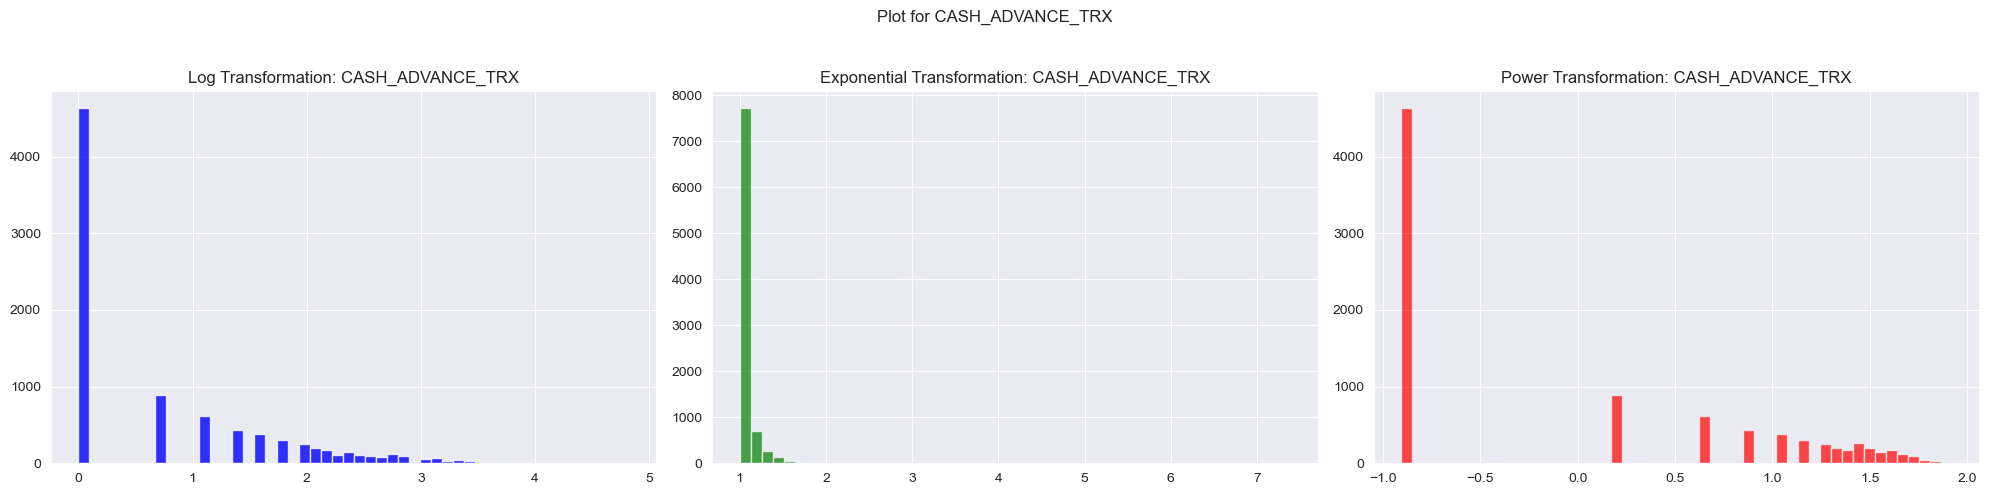

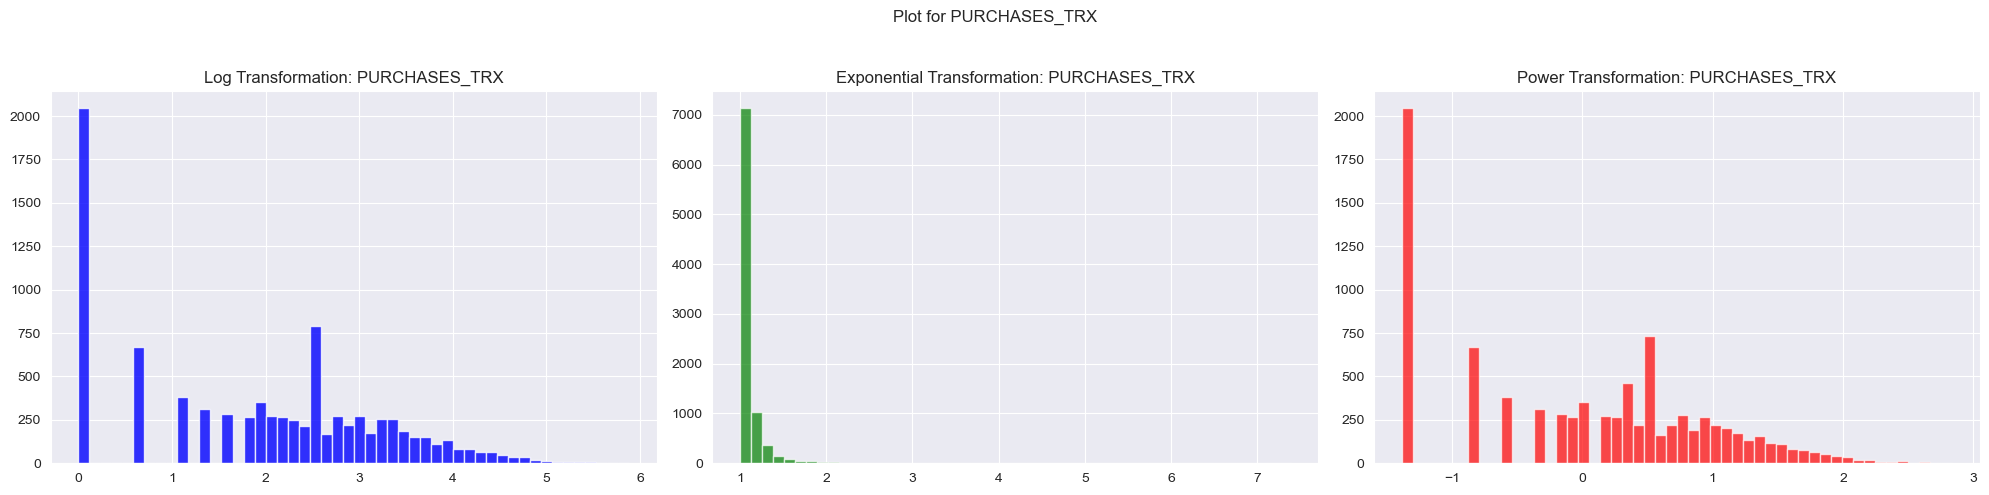

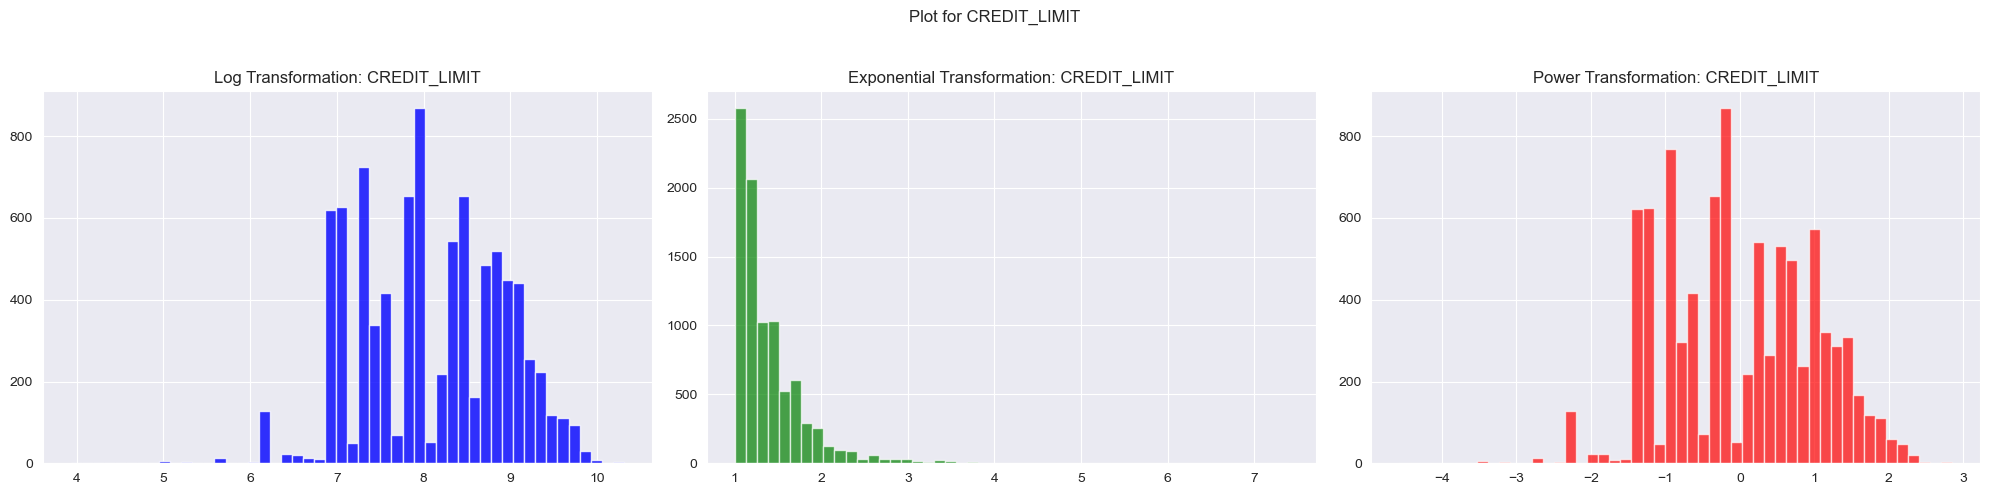

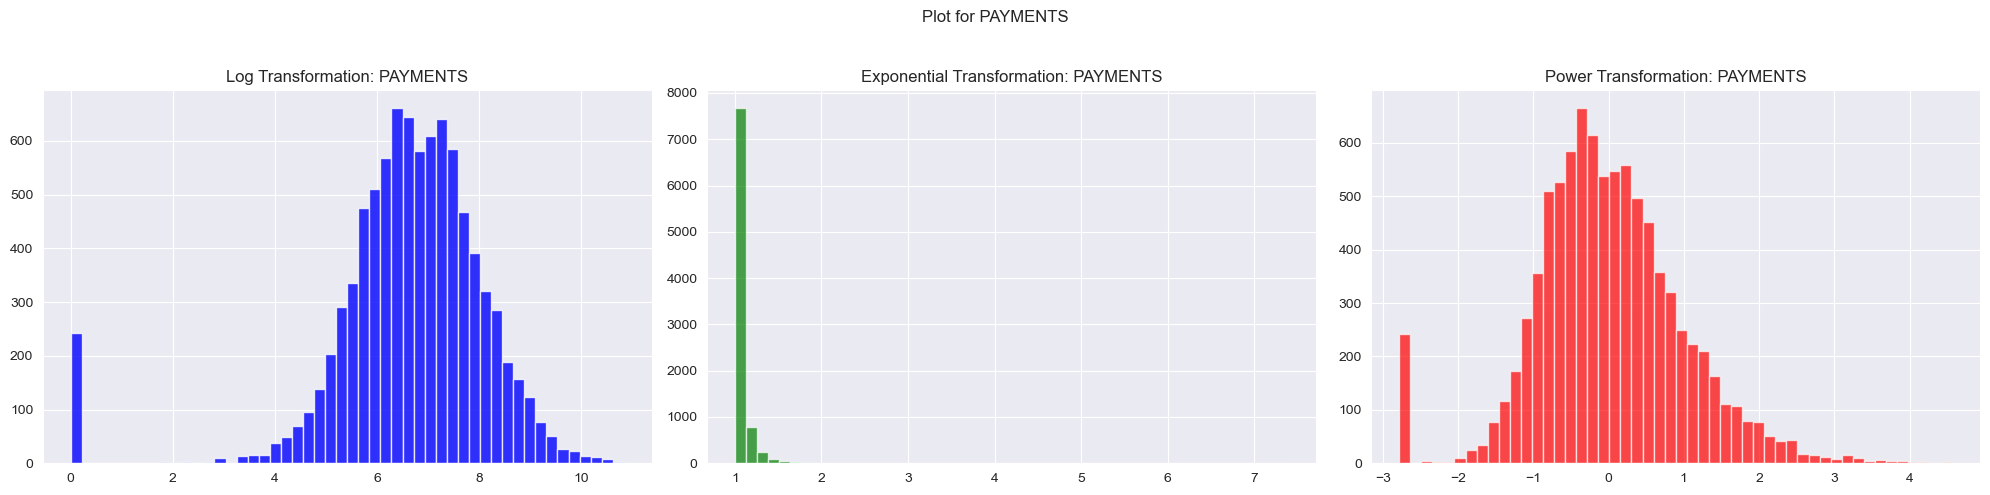

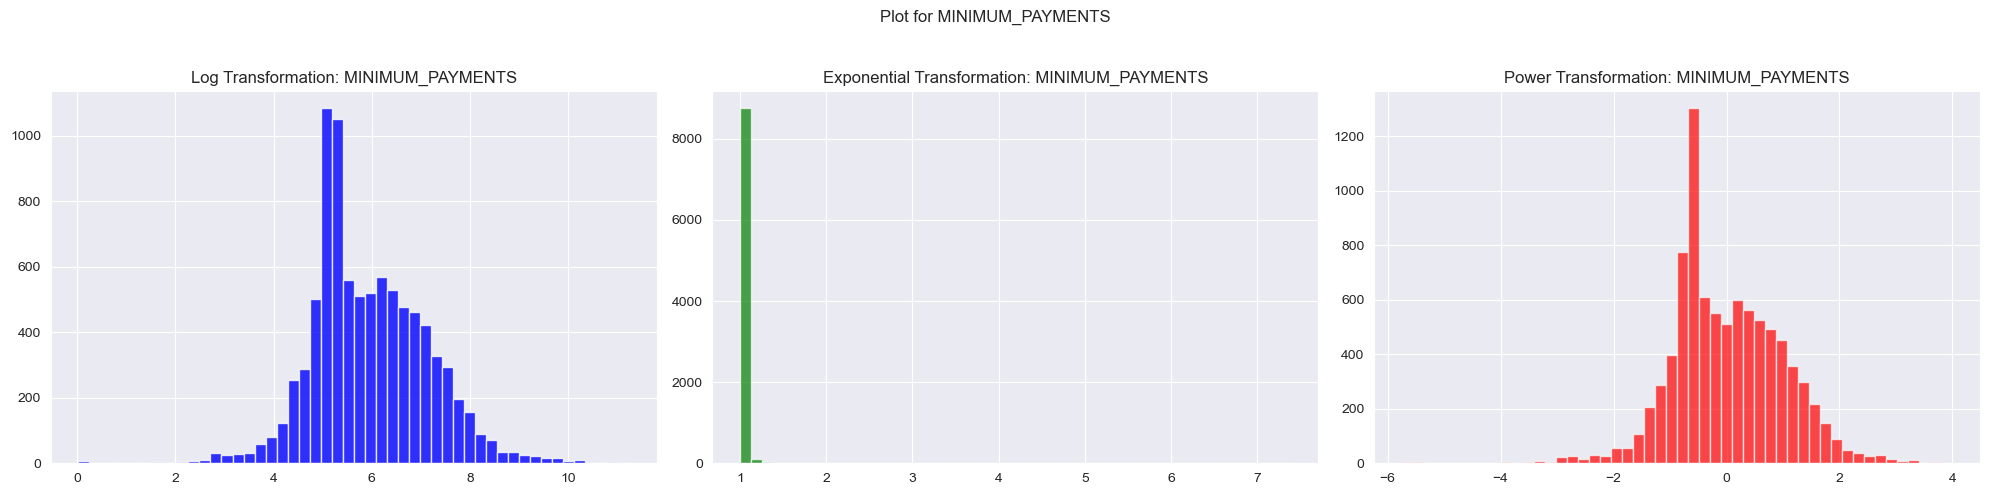

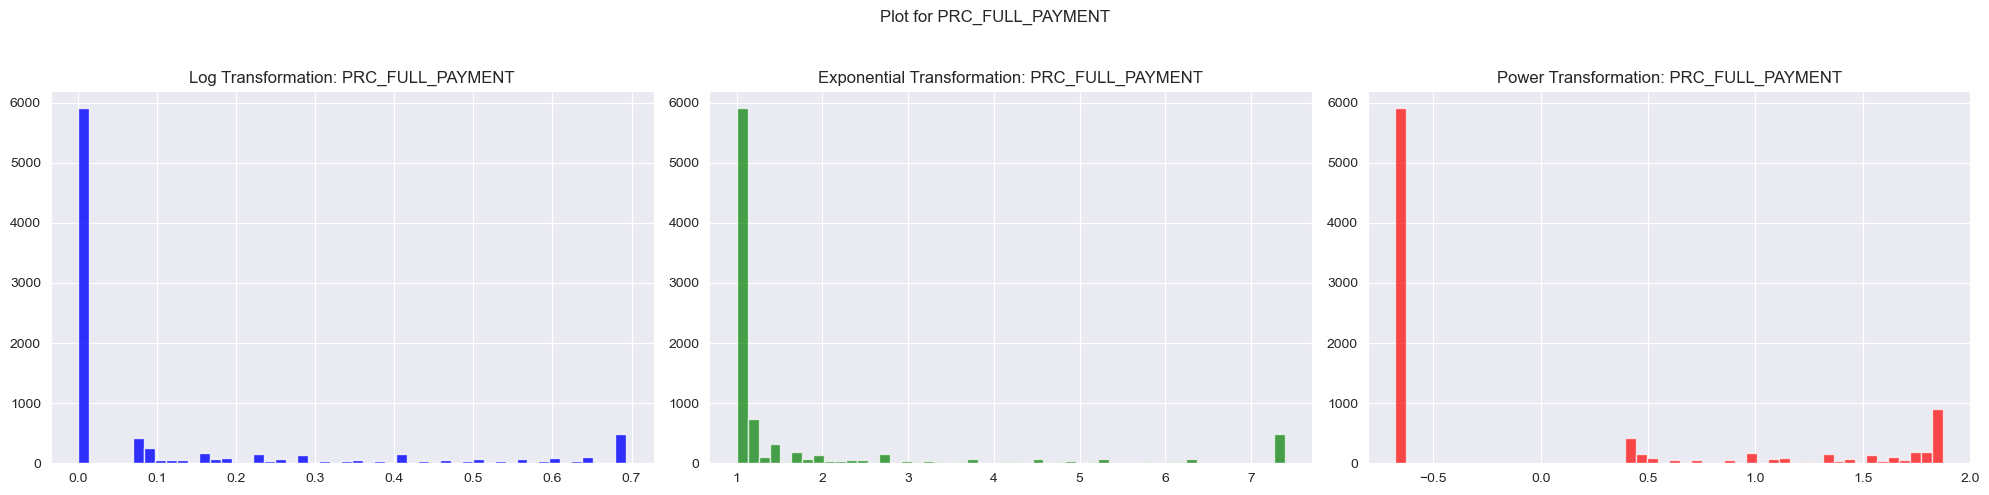

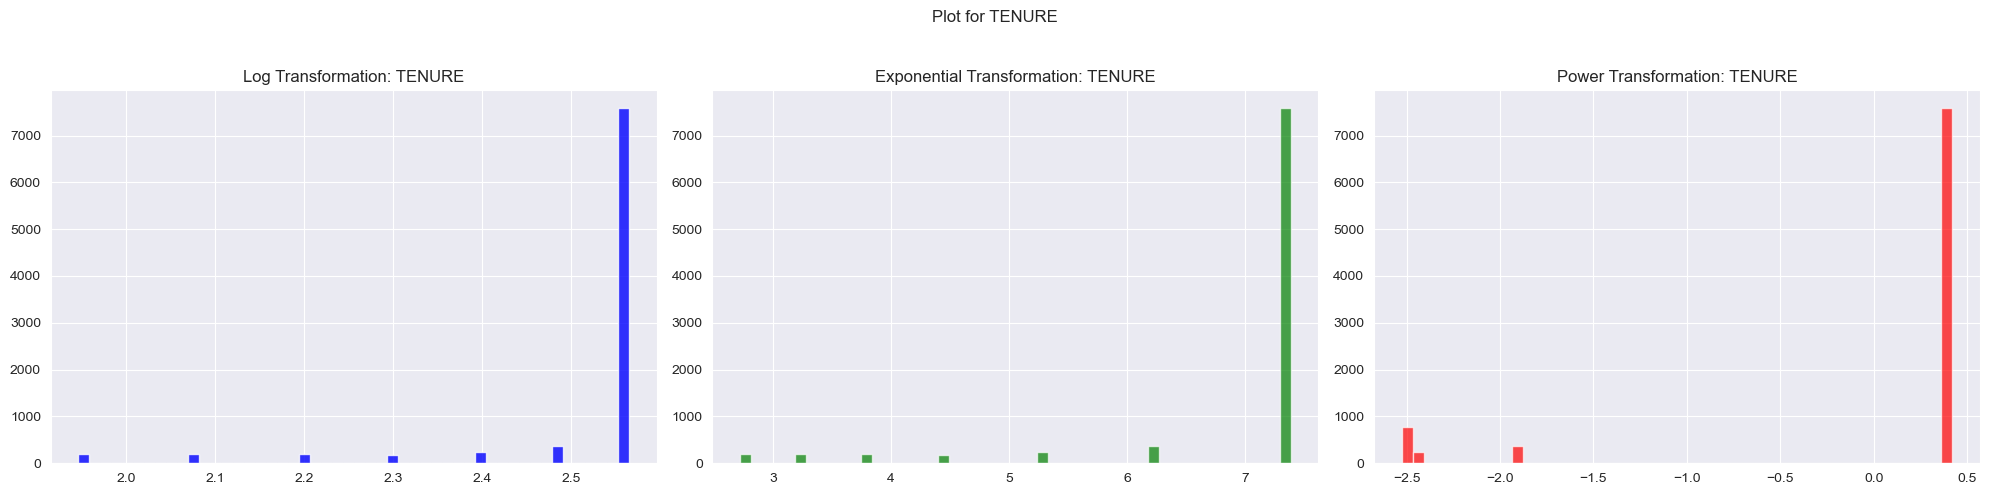

In [139]:
#Visualizing the data  

#For loop to run through all the columns 
for column in data_frame_smooth.columns[1:]:
    fig,axes = plt.subplots(1,3,figsize = (20,5)) 
    fig.suptitle(f'Plot for {column}')
    
    #Plotting log transformed plots 
    log_transformed = np.log1p(data_frame_smooth[column])
    axes[0].hist(log_transformed, bins = 50,color = 'blue' ,alpha = 0.8)
    axes[0].set_title(f'Log Transformation: {column}')
    #Plotting exponential transformed plots 
    
    exp_transformed = np.exp(2*data_frame_smooth[column]/np.max(data_frame_smooth[column]))
    axes[1].hist(exp_transformed, bins=50, color='green', alpha=0.7)
    axes[1].set_title(f'Exponential Transformation: {column}')
    #Plotting power transformed plots 
    pt = PowerTransformer()
    try:
        power_transformed = pt.fit_transform(data_frame_smooth[[column]].values)
        axes[2].hist(power_transformed, bins=50, color='red', alpha=0.7)
        axes[2].set_title(f'Power Transformation: {column}')
    except ValueError:
        axes[2].text(0.5, 0.5, 'Invalid for Power Transformation', horizontalalignment='center', verticalalignment='center')
        axes[2].set_title(f'Power Transformation: {column}')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show() #Viewing the plots 

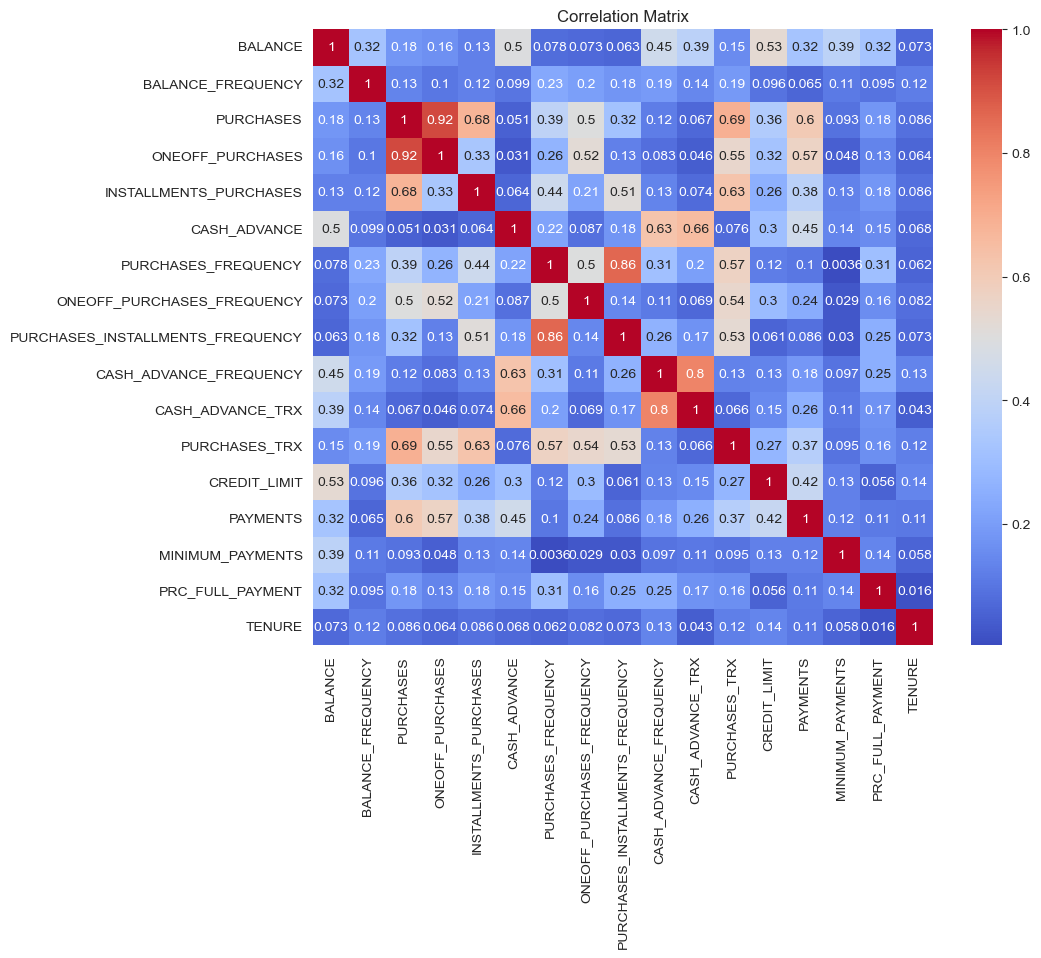

In [140]:
# Identifying and dropping highly correlated features
df = data_frame_smooth.drop('CUST_ID', axis = 1) #Dropping the column cust_id
cor_matrix = df.corr().abs() #Getting the correlation matrix 

#Plotting the figure 
plt.figure(figsize=(10, 8)) 
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [141]:
#Droppping the highly correlated values
upper_triangle = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.7)] #The limit of correlated values to be dropped is set as 0.7
print(f"Highly correlated features to drop: {high_corr_features}")

Highly correlated features to drop: ['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX']


In [142]:
#Dropping the highly correlated columns 
data = df.drop(high_corr_features, axis=1)
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,436.038012,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,291.12,0.000000,1.000000,0.000000,0.000000,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,300.00,0.000000,1.000000,0.000000,0.000000,6,1000.0,275.861322,65.652367,0.000000,6
8947,23.398673,0.833333,144.40,144.40,0.000000,0.833333,0.000000,0.000000,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,36.558778,0.000000,0.000000,0.166667,0,500.0,52.549959,55.755628,0.250000,6


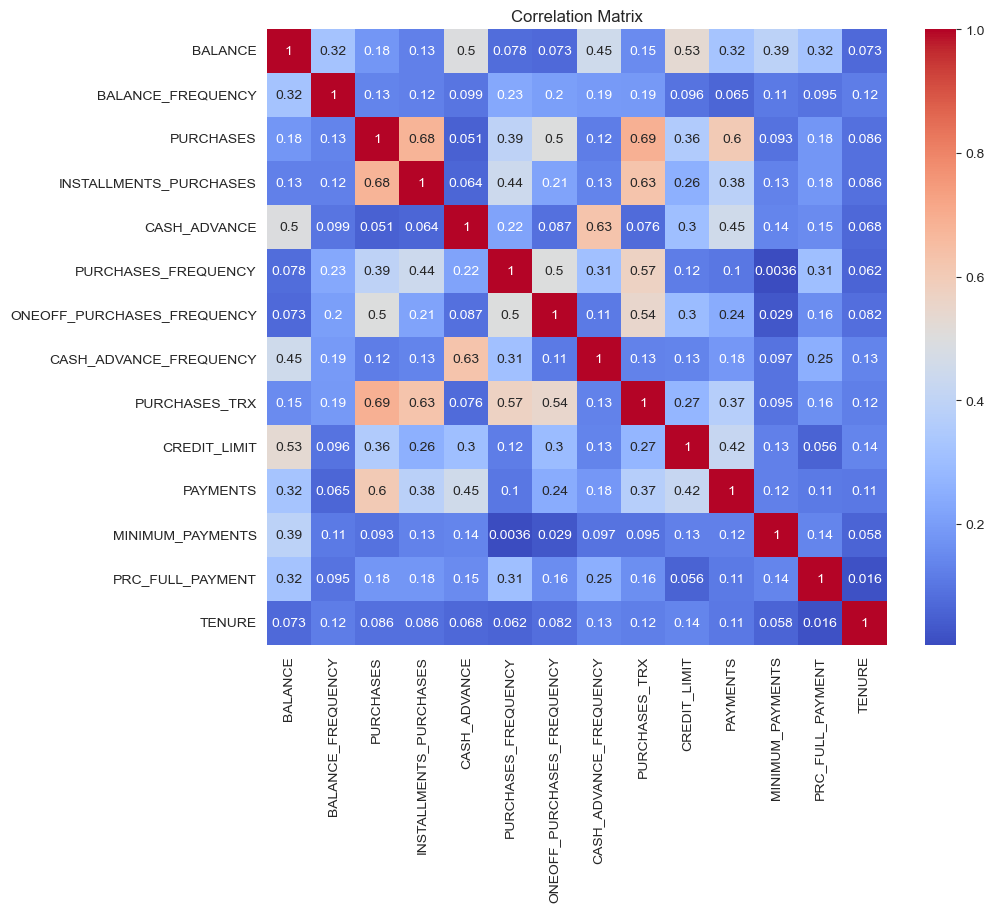

In [143]:
#Generating the correlation matrix again in order to confirm that all of the highly correlated values have been dropped 
cor_matrix = data.corr().abs()
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [144]:
#Question 2
#Classifying using K-Means 
## Clustering: Try to find meaningful customer segments using clustering
##Train k-means, and find the appropriate number of k.
## Train DBSCAN, and see if by varying MinPts and ε, you can get the same number of clusters as kmeans.
##Using the cluster assignment as the label, visualize the t-sne embedding.
##Try to give each cluster a name, such as “reckless spenders”

#Importing the libraries 
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [189]:
scaler = StandardScaler() #Setting the Scalar to Standard Scalar 
data_frame_smooth_2 = data_frame_smooth.drop('CUST_ID', axis = 1) #Smoothening the Data Frame and dropping the column CUST_ID
scaled_copy = scaler.fit_transform(data_frame_smooth_2)  #Making a copy of the given data frame 
scaled_data_frame = scaler.fit_transform(data_frame_smooth_2)  #Making another copy 

In [197]:
scaled_pca = scaler.fit_transform(data_frame_smooth_2) #Data Frame going to be used for Question 3 PCA  

In [147]:
inertia_values = [] #Initializing an array for storing inertia values 
k_range = range(1,50) #Defining the range of values of k

In [148]:
#Looping through the values of k and then calculating the inertia, after that appending the same into the previously defined array 
for k in k_range:
    kmeans = KMeans(n_clusters = k,random_state = 42)
    kmeans.fit(scaled_data_frame)
    inertia_values.append(kmeans.inertia_)

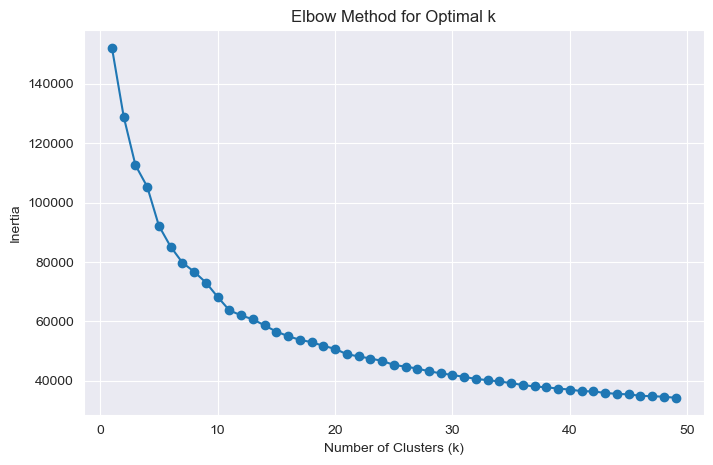

In [149]:
#Plotting the same as described above to get a better visualization of the same and to visually interpret the results 
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
'''
From the figure we can figure out that the elbow point is at K = 11. Thus we can conclude that optimal value of K to be 11
'''

In [92]:
#Doing the Silhouette Analysis 
from sklearn.metrics import silhouette_score #Importing the Silhouette score from Silhouette library

silhouette_scores = [] #Initializing an array to store the values 
 
for k in range(2, 50):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data_frame)
    score = silhouette_score(scaled_data_frame, labels)
    silhouette_scores.append(score)


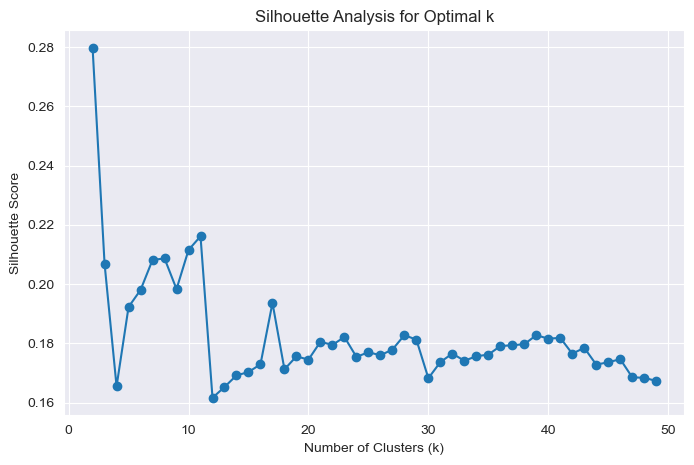

In [94]:
# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 50), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

In [ ]:
("From the above plot we can conclude that the optimal value of k lies in the range of 7 to 11. From the elbow method we are having the value of k to be 11.Thus the optimal value of k is chosen to be 11."
 "The above conclusions are done visually with the help of plots and then verifying the same by cross checking")

In [151]:
#Doing the K-Means clustering on the data by setting the optimal value for k 
optimal_k = 11 
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)

In [166]:
#Viewing the array final assignments, which contains the cluster to which a respective point belongs to 
final_assignments = final_kmeans.fit_predict(scaled_copy)
pprint.pprint(final_assignments)

array([ 1,  9,  2, ..., 10, 10, 10], dtype=int32)


In [304]:
#Viewing the number of elements from each cluster 
cluster_counts = pd.Series(cluster_labels).value_counts()
# Display the counts
pprint.pprint("Number of elements in each cluster:")
pprint.pprint(cluster_counts)

'Number of elements in each cluster:'
1     2410
4     1589
8     1076
9     1012
2     1006
3      692
10     592
7      338
6      168
0       44
5       23
Name: count, dtype: int64


In [190]:
scaled_copy = pd.DataFrame(scaled_copy) #Converting scaled_copy into a data frame 
scaled_copy[17] = final_assignments #Assigning the 17th column with the labelling of the clusters from K-Means Algorithm
scaled_copy #Viewing the same 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960454,-0.528979,-0.309340,-0.525551,0.360680,1
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688614,0.818642,0.088233,0.234227,0.360680,9
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826037,-0.383805,-0.101450,-0.525551,0.360680,2
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826037,-0.598688,-0.182960,-0.525551,0.360680,1
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905485,-0.364368,-0.264469,-0.525551,0.360680,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960454,-0.486217,-0.347964,1.183951,-4.122768,10
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960454,-0.503396,-0.340819,-0.525551,-4.122768,10
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960454,-0.570615,-0.333673,0.329200,-4.122768,10
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097877,-0.580536,-0.345037,0.329200,-4.122768,10


In [ ]:
#Importing the libraries 
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [173]:
#Initialiing the arrays 
eps_values = []
minpts = []

#Adding the values to the respective arrays 
for i in range(1,21):
    eps_values.append(i/10)
    minpts.append(i)
possible_values = [] #An array to store the possible values of minpoints and eps for getting the same number of clusters


#Performing DBScan on the given data frame in order to figure out the parameters that is going to give same number of clusters to that of K-Means (11 Clusters )
for eps in eps_values:
    for minpts in minpts_values:
        dbscan = DBSCAN(eps=eps, min_samples=minpts)
        labels = dbscan.fit_predict(scaled_copy.drop(columns=['17']))  # Drop the k-means cluster column
        
        # Count clusters (-1 indicates noise)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters == 11: 
            possible_values.append([eps,minpts])
        pprint.pprint(f"DBSCAN: ε={eps}, MinPts={minpts}, Number of clusters: {n_clusters}")


'DBSCAN: ε=0.1, MinPts=5, Number of clusters: 11'
'DBSCAN: ε=0.1, MinPts=10, Number of clusters: 2'
'DBSCAN: ε=0.1, MinPts=15, Number of clusters: 1'
'DBSCAN: ε=0.2, MinPts=5, Number of clusters: 32'
'DBSCAN: ε=0.2, MinPts=10, Number of clusters: 8'
'DBSCAN: ε=0.2, MinPts=15, Number of clusters: 3'
'DBSCAN: ε=0.3, MinPts=5, Number of clusters: 41'
'DBSCAN: ε=0.3, MinPts=10, Number of clusters: 11'
'DBSCAN: ε=0.3, MinPts=15, Number of clusters: 5'
'DBSCAN: ε=0.4, MinPts=5, Number of clusters: 32'
'DBSCAN: ε=0.4, MinPts=10, Number of clusters: 14'
'DBSCAN: ε=0.4, MinPts=15, Number of clusters: 9'
'DBSCAN: ε=0.5, MinPts=5, Number of clusters: 37'
'DBSCAN: ε=0.5, MinPts=10, Number of clusters: 9'
'DBSCAN: ε=0.5, MinPts=15, Number of clusters: 2'
'DBSCAN: ε=0.6, MinPts=5, Number of clusters: 30'
'DBSCAN: ε=0.6, MinPts=10, Number of clusters: 9'
'DBSCAN: ε=0.6, MinPts=15, Number of clusters: 5'
'DBSCAN: ε=0.7, MinPts=5, Number of clusters: 28'
'DBSCAN: ε=0.7, MinPts=10, Number of clusters: 8

In [174]:
pprint.pprint(possible_values) #Checking for the possible values for DBScan to match the number of clusters in K-Means 

[[0.1, 5], [0.3, 10], [1.1, 5]]


In [ ]:
'''
Here we got 3 different possibilities for the clustering and I am going with the minimum value of minpts and the minimum value among the eps of sets having min minpts. Thus I will be choosing the following parameters := 
eps = 0.1 and minputs = 5
'''

In [175]:
#Importing the necessary libraries 
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [309]:
#Setting the DBScan by initializing the same 
dbscan = DBSCAN(eps=0.1, min_samples=5) #Setting the parameters of DBScan 
scaled_copy[18] = dbscan.fit_predict(scaled_copy) #Adding column 18 as DBScan clusters 

In [278]:
scaled_copy #Viewing the scaled data frame  

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960454,-0.528979,-0.309340,-0.525551,0.360680,1,-1
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688614,0.818642,0.088233,0.234227,0.360680,9,-1
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826037,-0.383805,-0.101450,-0.525551,0.360680,2,-1
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826037,-0.598688,-0.182960,-0.525551,0.360680,1,-1
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905485,-0.364368,-0.264469,-0.525551,0.360680,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960454,-0.486217,-0.347964,1.183951,-4.122768,10,-1
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960454,-0.503396,-0.340819,-0.525551,-4.122768,10,-1
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960454,-0.570615,-0.333673,0.329200,-4.122768,10,-1
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097877,-0.580536,-0.345037,0.329200,-4.122768,10,-1


In [226]:
scaled_data_frame = pd.DataFrame(scaled_data_frame) #Converting into a DataFrame 
scaled_data_frame.head() #Viewing the data frame 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960454,-0.528979,-0.309340,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688614,0.818642,0.088233,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826037,-0.383805,-0.101450,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826037,-0.598688,-0.182960,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905485,-0.364368,-0.264469,-0.525551,0.36068


In [284]:
#Performing t-SNE 

#Importing the libraries 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Using t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # Tuning the parameters of t-SNE . Here we are projecting the multi-dimensional data into a 2-D Space 
tsne_result = tsne.fit_transform(scaled_data_frame)

# Create a new DataFrame for visualization
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = scaled_copy[17]  # Use k-means or DBSCAN cluster labels

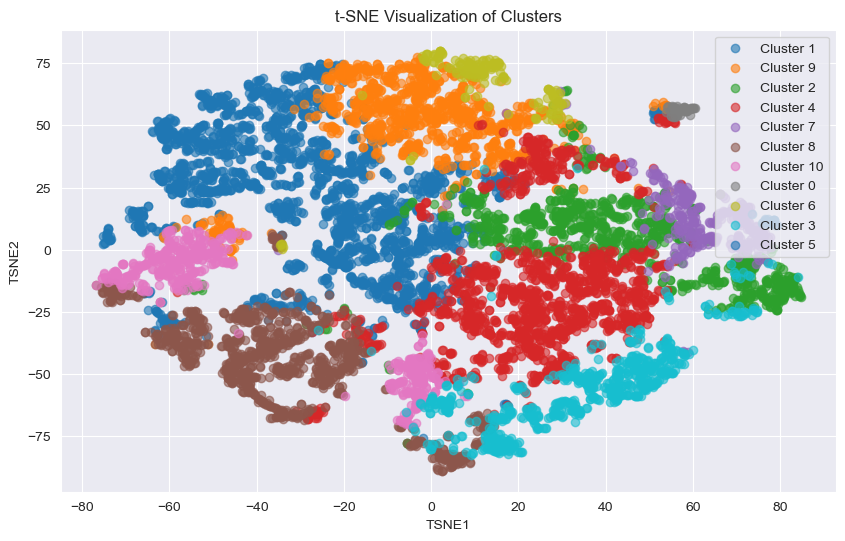

In [282]:
# Plot t-SNE results
plt.figure(figsize=(10, 6))
for cluster in tsne_df['Cluster'].unique():
    cluster_data = tsne_df[tsne_df['Cluster'] == cluster]
    plt.scatter(cluster_data['TSNE1'], cluster_data['TSNE2'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('t-SNE Visualization of Clusters')
plt.legend()
plt.show()

In [ ]:
'''
As we can see, there are 11 clusters based on the K-Means clustering.

Given below are the labels given to each cluster 
1.Cluster 1 --> Very Very Low Bank Balance 
2.Cluster 2 --> Very Low Bank Balance
3.Cluster 3 --> Low Bank Balance
4.Cluster 4 --> Moderate Bank Balance 
5.Cluster 5 --> Good Bank Balance 
6.Cluster 6 --> Very Good Bank Balance
7.Cluster 7 --> Very Very Good Bank Balance
8.Cluster 8 --> Exceptionally Good Bank Balance
9.Cluster 9 --> Rich class
10.Cluster 10 --> Extremely Rich Class
11.Cluster 11 --> Supremely Rich Class 
'''

In [198]:
#Question 3 
##PCA: Try to find if there are only a few components/directions that explain most of the variance in the data.
## First, normalize each variable independently. Then Train PCA on appropriate variables.
##Plot the variance explained versus PCA dimensions.
## Reconstruct the data with various numbers of PCA dimensions, and compute the MSE.

#Principal Component Analysis 
#Importing the required libraries 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [199]:
normalized_data = scaled_pca #Copying the data frame to the variable normalized_data 

In [202]:
#Converting the variable to a Data Frame 
normalized_data = pd.DataFrame(normalized_data)
normalized_data #Viewing the data frame to get a better idea of the same 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960454,-0.528979,-0.309340,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688614,0.818642,0.088233,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826037,-0.383805,-0.101450,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826037,-0.598688,-0.182960,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905485,-0.364368,-0.264469,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960454,-0.486217,-0.347964,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960454,-0.503396,-0.340819,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960454,-0.570615,-0.333673,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097877,-0.580536,-0.345037,0.329200,-4.122768


In [234]:
pca = PCA() #Setting up the variable to do Principal Component Analysis 
pca.fit(normalized_data) #Fitting the data using PCA 

PCA()


In [252]:
explained_variance = pca.explained_variance_ratio_ #Calculating the explained variance by each of the components 
explained_variance_percentages = [] #Array to hold the percentage values of the same 
#Initializng the variables 
sum = 0 
count = 0

flag = True  #Setting the flag variable as True , used to break the counting procedure when a condition is met 
#Loop in order to convert every value into percentages 
for val in explained_variance:
    temp = val*100 
    sum += temp #Increasing the sum 
    if flag == True: #Increasing the value of count only if the Flag is 1
        count += 1 #Increasing the count 
    if (sum > 90) and (flag == True):
        flag = False #Setting the flag to be False to break the counting procedure 
        pprint.pprint(sum)
    explained_variance_percentages.append(temp)
count #Displaying the number of components that are required to explain over 90% of the observed variance 

91.9269639945451


10

In [248]:
pprint.pprint(explained_variance_percentages) #Displaying the variance captured by the various components 

[27.289567783720347,
 20.295534984065327,
 8.789357749217192,
 7.479060804352103,
 6.265322220342194,
 5.746344063583427,
 4.888325586222233,
 4.259648913402408,
 3.83377221249546,
 3.0800296771444042,
 2.3718928977031557,
 1.7756359211733745,
 1.4275214208382052,
 1.217393900452592,
 1.0134929664425987,
 0.2670303764755485,
 6.852236943254951e-05]


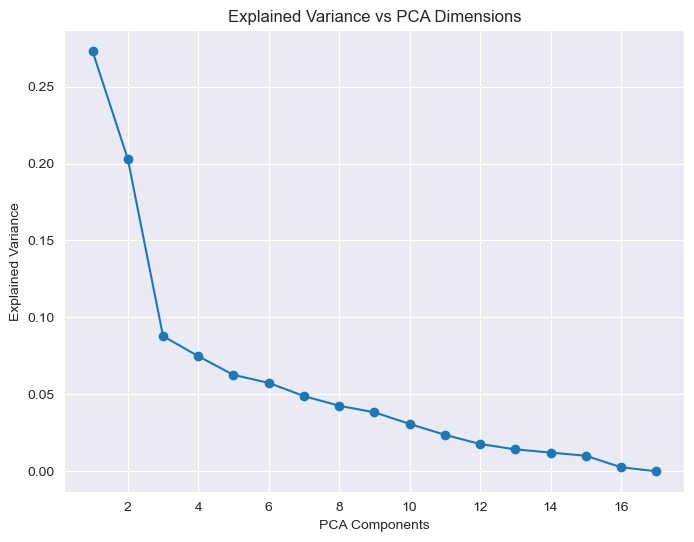

In [231]:
# Plotting the Variance explained by components 
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance vs PCA Dimensions')
plt.xlabel('PCA Components')
plt.ylabel('Explained Variance')
plt.show()

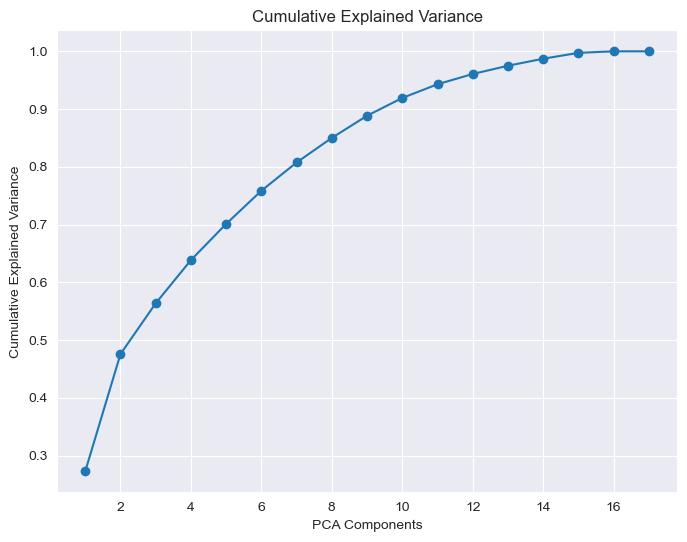

In [232]:
# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance) 

#Plotting the same 
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
'''
From the observations made above, we can conclude that only 10 parameters are required in order to explain over 90 percentage of the variance in the data.Thus we can model the given data set satisfactorily by using 10 of the components. 

'''

In [207]:
#Defining a function to reconstruct the data with different number of PCA components and compute MSE
def reconstruct_data_with_pca(n_components, data):
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(data)  # Reduce the data
    reconstructed_data = pca.inverse_transform(reduced_data)  # Reconstruct the data
    return reconstructed_data

In [213]:
# Compute MSE for different number of components
#Initializing arrays to store values 
mse_values = [] 
components_range = []

for i in range(1,17):
    components_range.append(i)
for n in components_range:
    reconstructed_data = reconstruct_data_with_pca(n, normalized_data)
    mse = mean_squared_error(normalized_data, reconstructed_data)
    mse_values.append(mse)

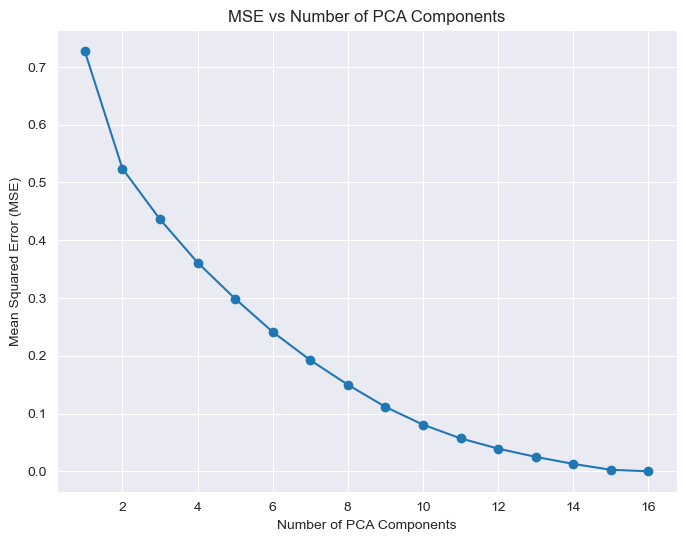

In [214]:
# Plot MSE vs Number of Components
plt.figure(figsize=(8, 6))
plt.plot(components_range, mse_values, marker='o')
plt.title('MSE vs Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

In [ ]:
'''
From the graph we can see that the MSE keeps on decreasing as we increases the number of components and is having a minimum when all of the components are taken. The MS value for number of components equals to 10 is 0.0807303, which is indeed a very small value and thus we can easily conclude that the data is satisfactorily described by the 10 components considered above. 
'''